# Advanced Java & Advanced Python Assignment
## Deng Chuan Chang | Yasser El Karkouri | Julien Godfroy
### Advertising Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from  Class.ModelClass import * # Importing the Model class from ModelClass.py


In [2]:
def import_clean_data(path,input_list, output_list):
    """Import the data from the csv file and clean it, then randomise the order of the rows."""
    df = pd.read_csv(path)
    #remove all columns that are not in the input list and the output list
    df = df[input_list + output_list]
    df = df.dropna()
    #drop all cells with char
    df = df.apply(pd.to_numeric, errors='coerce')
    #reset index
    df = df.reset_index(drop=True)
    #randomise the order of the rows
    #df = df.sample(frac=1).reset_index(drop=True)
    x = df[input_list].values
    y = df[output_list].values
    return x, y, df

def prepare_vectors(x, y):
    """Takes the input and output vectors and returns the normalised input vector and the output vector reshaped."""
    #normalise
    X = (x - np.mean(x)) / np.std(x)
    y = y.reshape(y.shape[0],1)
    return X, y

def find_combination(X, y, test_size_list, iteration_list, rate_list ):
    """Returns a dataframe with the metrics for each combination of test_size, iteration and rate."""
    model_dict = {}
    model_df = pd.DataFrame(columns=['test_size', 'iteration', 'rate', 'r_square', 'mse'])  #create empty dataframe

    #for each combination of test_size, iteration and rate, compute the model and add it to the model_dict
    for test_size in test_size_list:
        for iteration in iteration_list:
            for rate in rate_list:
                model = Model(X, y, rate, iteration, test_size)
                model.compute_regression()
                model_dict[(test_size, iteration, rate)] = model
            
    #sort model_dict by r_square, if r_square is the same, sort by iteration Descending
    model_dict = sorted(model_dict.items(), key=lambda x: x[1].get_r_square(), reverse=True)
    
    #convert dict to dataframe
    for i in range(len(model_dict)):
        model_df.loc[i] = [model_dict[i][0][0], model_dict[i][0][1], model_dict[i][0][2], model_dict[i][1].get_r_square(), model_dict[i][1].mse]

    return model_df, model_dict            

<br><br>
### Before computing regression, let's do some data analysis

<AxesSubplot: >

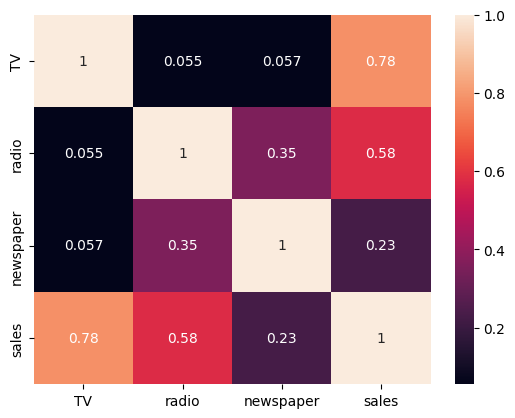

In [3]:
x, y, df = import_clean_data('./data/Advertising.csv', input_list=['TV', 'radio', 'newspaper'], output_list=['sales'])
df.head()

#heatmap for the correlation coefficient between the variables
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

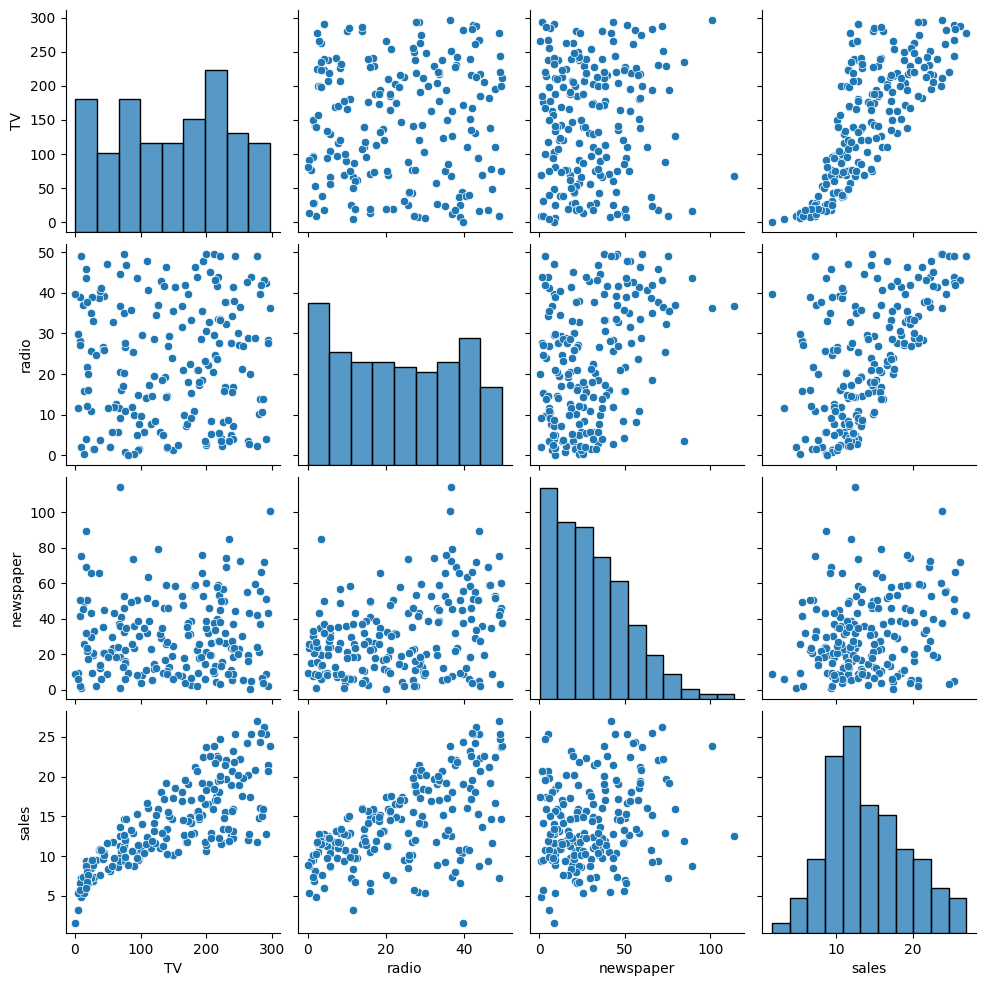

In [4]:
#plot correlation between all variables
%matplotlib inline
sns.pairplot(df)


In [5]:
#spearman correlation for all combination of columns
from scipy.stats import spearmanr
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr, _ = spearmanr(df[df.columns[i]], df[df.columns[j]])
        print('Spearmans correlation between {} and {} is: {}'.format(df.columns[i], df.columns[j], corr))

Spearmans correlation between TV and radio is: 0.05612339226247207
Spearmans correlation between TV and newspaper is: 0.05083973485105542
Spearmans correlation between TV and sales is: 0.8006143768505688
Spearmans correlation between radio and newspaper is: 0.3169794890663236
Spearmans correlation between radio and sales is: 0.5543037314053145
Spearmans correlation between newspaper and sales is: 0.19492188424873094


Spearmans correlation between sum and sales is: 0.8770508999294694


Text(0, 0.5, 'Sales')

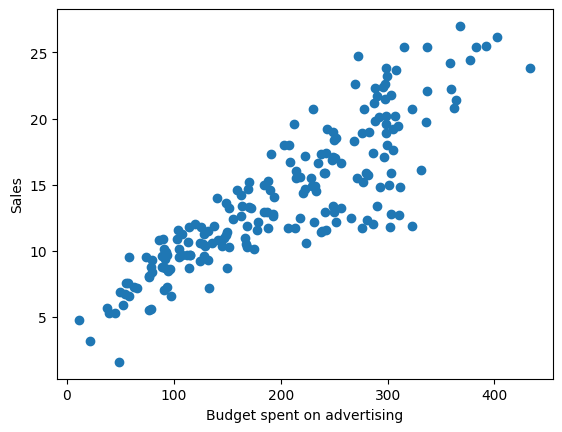

In [6]:
# Create a new column of the sum of the budget spent on advertising
df['adv_budget'] = df['TV'] + df['radio'] + df['newspaper']

#spearman
corr, _ = spearmanr(df['adv_budget'], df['sales'])
print('Spearmans correlation between sum and sales is: {}'.format(corr))

#plot
plt.scatter(df['adv_budget'], df['sales']) 
plt.xlabel('Budget spent on advertising')
plt.ylabel('Sales')

<br><br>
### Let's  compute the regression using TV and RADIO predictors only

In [7]:
x, y, df = import_clean_data('./data/Advertising.csv', input_list=['TV', 'radio'], output_list=['sales'])
X, y = prepare_vectors(x, y)

Let's find out what is the best combinaison of:
- Test size
- Number of iterations
- Learning rate


In [8]:
test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
iteration_list = [50, 100, 500, 1000, 3000, 5000, 7000, 10000]
rate_list = [0.1, 0.05, 0.01, 0.001, 0.0001]

model1_df, model1_dict = find_combination(X, y, test_size_list, iteration_list, rate_list)


In [9]:
model1_df
#model1_df.to_csv('model_df.csv')   #to save in a csv file

model1_df.head()


,test_size,iteration,rate,r_square,mse
0,0.4,10000.0,0.10,0.914199,2.232220
1,0.4,7000.0,0.10,0.914199,2.232220
2,0.4,5000.0,0.10,0.914199,2.232220
3,0.4,10000.0,0.05,0.914199,2.232220
4,0.4,7000.0,0.05,0.914197,2.232259


In this case, the best model the 4th one. Because the other computes more iterations without improving significativly the model  :
<br>Best : 
- Test size = 0.4
- Number of iterations = 5000
- Learning rate = 0.1

Let's visualize the regression line and the cost function

array([[ 3.88722475],
       [16.15342108],
       [22.87371499]])

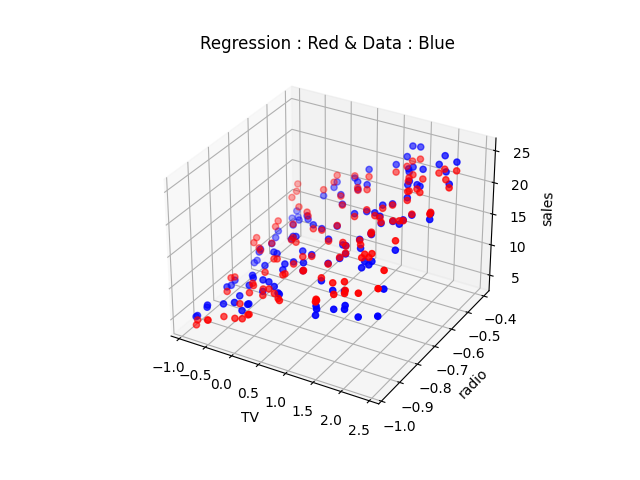

In [10]:
best_model = model1_dict[3][1] #get best model (the 4th one)
#make sure ipympl is installed (pip intall ipympl)
%matplotlib widget
best_model.plot_regression_3D('TV', 'radio', 'sales')
best_model.theta


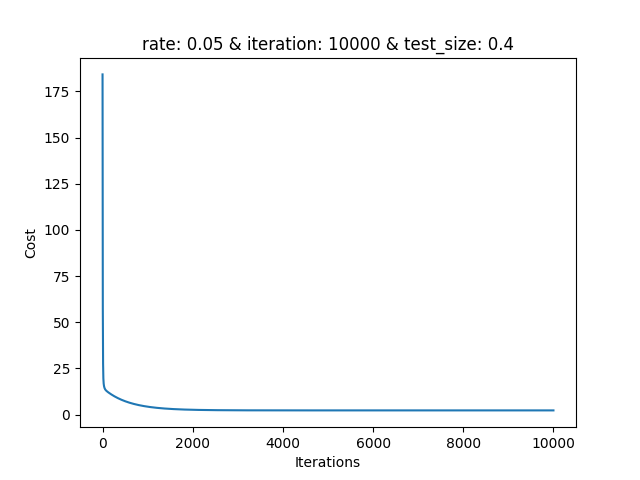

In [11]:
%matplotlib widget
best_model.plot_cost()

Now we can test our model

In [12]:
mse, r_square, predictions = best_model.test_model()
print('mse: ', mse)
print('r_square: ', r_square)

mse:  3.6984664512859937
r_square:  0.8685643671502647


No such comm: b724420a195f408998f664fe85c319f1
No such comm: b724420a195f408998f664fe85c319f1


mse:  3.698465941063259
r_square:  0.8685643852824958


<br><br><br><br><br>

### Let's import the data Adversiting.csv to process TV and RADIO and NEWSPAPERS predictors

Let's find out what is the best combinaison of:
- Test size
- Number of iterations
- Learning rate


In [13]:
#import data
x, y, df = import_clean_data('./data/Advertising.csv', input_list=['TV', 'radio', 'newspaper'], output_list=['sales'])
X, y = prepare_vectors(x, y)


In [14]:
#compute all models
model2_df, model2_dict = find_combination(X, y, test_size_list, iteration_list, rate_list)


In [15]:
model2_df.head()

No such comm: f00cf6a81801440ab74922a5af5286e9


,test_size,iteration,rate,r_square,mse
0,0.4,10000.0,0.10,0.915685,2.193546
1,0.4,7000.0,0.10,0.915685,2.193546
2,0.4,10000.0,0.05,0.915685,2.193546
3,0.4,5000.0,0.10,0.915685,2.193546
4,0.4,7000.0,0.05,0.915685,2.193549


,test_size,iteration,rate,r_square,mse
0,0.4,10000.0,0.10,0.915685,2.193546
1,0.4,7000.0,0.10,0.915685,2.193546
2,0.4,10000.0,0.05,0.915685,2.193546
3,0.4,5000.0,0.10,0.915685,2.193546
4,0.4,7000.0,0.05,0.915685,2.193548


In [16]:
#Test of the model
model2_best = model2_dict[0][1] #get best model (the 1st one)
mse, r_square, predictions =model2_best.test_model()
print('mse: ', mse)
print('r_square: ', r_square)


mse:  3.862059170068194
r_square:  0.8627506298064338


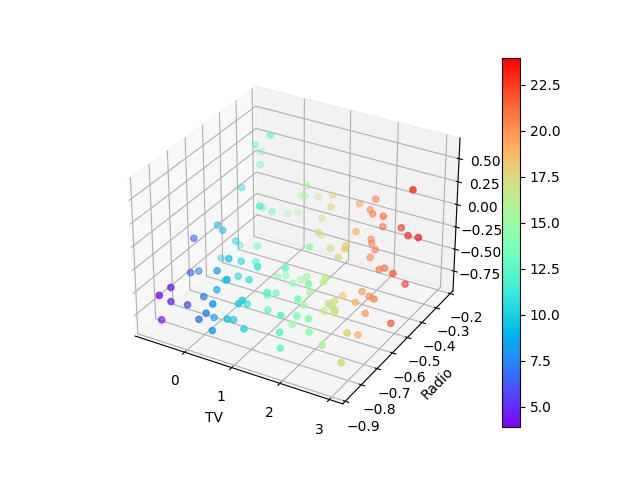

In [17]:


# Créer une figure 3D + sales bar
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Utiliser la couleur pour représenter les ventes
scatter = ax.scatter(model2_best.X_train[:,0], model2_best.X_train[:,1], model2_best.X_train[:,2], c=model2_best.X_train.dot(model2_best.theta), cmap='rainbow')

# Ajouter une barre de couleur
plt.colorbar(scatter)

# Ajouter des étiquettes d'axes
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

# Afficher le graphique
plt.show()


<br><br><br>
### Suppose that spending money on radio advertising actually increases the effectiveness of TV advertising

sales = θ0 + θ1 ∗TV + θ2 ∗radio + θ3 ∗(radio ∗TV )

In [18]:
x, y, df = import_clean_data('./data/Advertising.csv', input_list=['TV', 'radio', 'newspaper'], output_list=['sales'])
X, y = prepare_vectors(x, y)

X[:,2] = X[:,0] * X[:,1] #add interaction between TV and radio and rewrite it in the 3rd column




model3_df, model3_dict = find_combination(X, y, test_size_list, iteration_list, rate_list)

In [19]:
model3_df.head(5)
#model3_df.to_csv('model3_df.csv')   #to save in a csv file

,test_size,iteration,rate,r_square,mse
0,0.7,10000.0,0.10,0.978194,0.611915
1,0.7,7000.0,0.10,0.978194,0.611915
2,0.7,10000.0,0.05,0.978194,0.611923
3,0.7,5000.0,0.10,0.978194,0.611925
4,0.7,7000.0,0.05,0.978181,0.612274


In this case, the best one is the 3rd one. Because the other computes more iterations without improving the model. 

<br>Best :
- Test size = 0.7
- Number of iterations = 5000
- Learning rate = 0.1

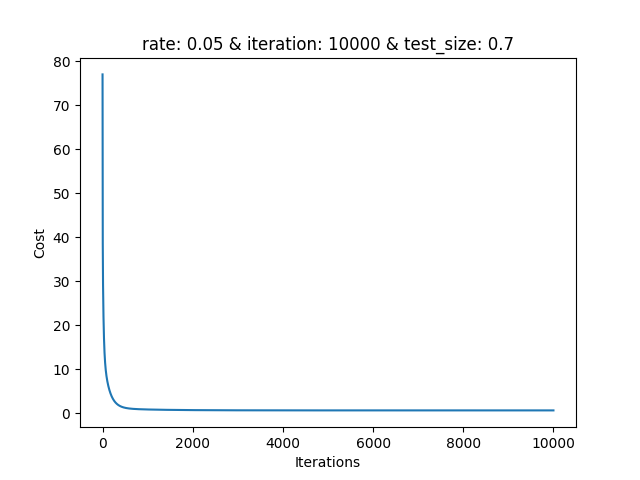

In [20]:
best_model3 = model3_dict[2][1] #get best model (the 1st one)
%matplotlib widget

best_model3.plot_cost()

In [21]:
#test the model with the test set
mse, r_square, predictions = best_model3.test_model()
print('mse: ', mse)
print('r_square: ', r_square)

mse:  1.0150674992972937
r_square:  0.9616161231153678


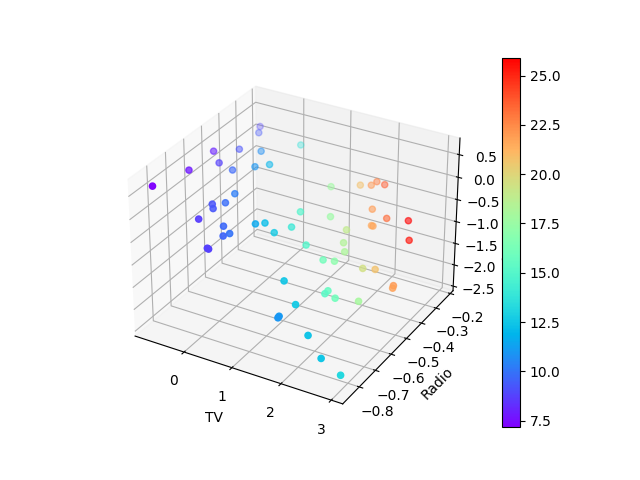

In [22]:


# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color to represent sales
scatter = ax.scatter(best_model3.X_train[:,0], best_model3.X_train[:,1], best_model3.X_train[:,2], c=best_model3.X_train.dot(best_model3.theta), cmap='rainbow')
plt.colorbar(scatter)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Advertising Budget')

plt.show()
